<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Métodos Funcionales en Aprendizaje Automático</div><br>
    <div style="font-size: x-large; color:gray">Diffusion Maps</div><br>
    <div style="font-size: large">Ángela Fernández Pascual - Universidad Autónoma de Madrid</div><br></div><hr>
</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [1]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Exercise"; display: block; margin: 0px 10px 10px 10px;}
                   
    .tqst {background-color: #97d0a7; padding:10px; border-radius: 5px; border: solid 2px #63BA97;}
    .tqst:before {font-weight: bold; content:"Team Exercise"; display: block; margin: 0px 10px 10px 10px;}
           
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

This cell imports the packages to be used.

In [3]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.datasets import make_swiss_roll
from sklearn.metrics import pairwise_distances

from mpl_toolkits.mplot3d import Axes3D
Axes3D

matplotlib.rc('figure', figsize=(15, 5))

seed = 123
my_cmap = plt.cm.Spectral

# Dataset

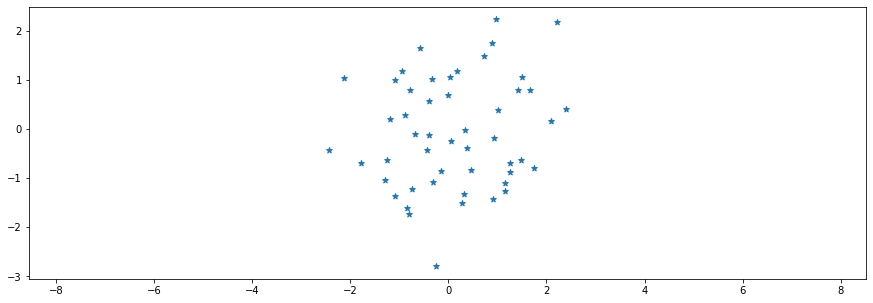

In [4]:
N=50
d=2

np.random.seed(seed)
X=np.random.randn(N,d)
plt.scatter(X[:,0], X[:,1], marker='*', cmap=my_cmap)
plt.axis('equal')
plt.show()

# Building a Graph

## Defining the affinity matrix

The first step in **Diffusion Maps** consist of building a symmetric weighted graph. For doing this, let's define the affinity matrix via a kernel matrix.

<div class="tqst">

* Define the affinity matrix in terms of the Gaussian Kernel.

    **Remark**: Do not compute the distance point by point, but in an efficient way for the whole matrix. You can use *scikit-learn* functions for computing the matrix distance. 
</div>

In [5]:
def RBF(x, y, sigma = 1.0):
    d = pairwise_distances(x, y)
    return np.exp(-d/2/sigma**2)

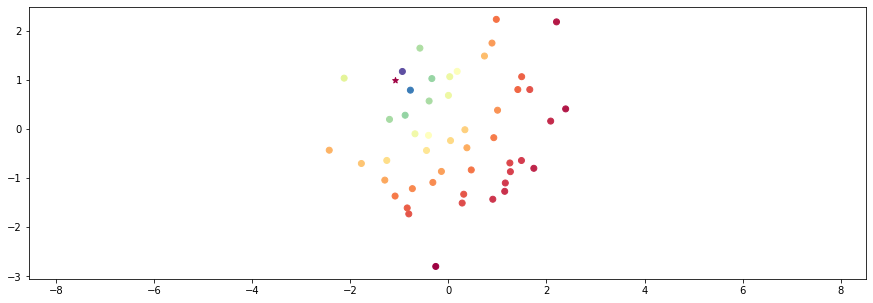

In [6]:
K = RBF(X, X)
plt.scatter(X[1:,0], X[1:,1], marker='o', c = K[1:,0], cmap=my_cmap)
plt.scatter(X[0,0], X[0,1], marker='*', c = K[0,0], cmap=my_cmap)
plt.axis('equal')
plt.show()

# Random Walk over the graph

## Transition Probability

Once the graph is built, let's define a **transition probability** from the affinity matrix,to simulate a random walk over the graph.

<div class="tqst">

* Define the transition probability.

    **Remark**: To be efficient, you should not use a for loop. Try to do it using matrices and arrays  operations. Check at the end that each row sum 1.
</div>

In [27]:
P = K/np.sum(K, axis=1)
P

array([[0.05002639, 0.01132635, 0.03632712, ..., 0.03088387, 0.01549204,
        0.01463125],
       [0.01201195, 0.04717104, 0.01069506, ..., 0.01218411, 0.02536176,
        0.02270693],
       [0.03307417, 0.00918158, 0.05494665, ..., 0.03222382, 0.01093753,
        0.01300927],
       ...,
       [0.0343589 , 0.01278138, 0.03937556, ..., 0.04496675, 0.01438456,
        0.01813472],
       [0.01536577, 0.02371927, 0.01191535, ..., 0.01282433, 0.05043749,
        0.01654756],
       [0.01830955, 0.02679359, 0.01788097, ..., 0.02039856, 0.02087779,
        0.03997634]])

## Steps in the probability

In Diffusion Maps, as it is studied as a diffusion process, it is important to check how the process evolves with time. Let's check the effect of the steps $t$ over the graph.

<div class="tqst">

* Compute $P^{t}$ for t=1..10.

* Check how much it affects the graph, for example by plotting it. 

</div>

In [35]:
def evolution(P, t):
    return np.linalg.matrix_power(P, t)
evolution(P, 4)

array([[0.0196348 , 0.01920307, 0.01962144, ..., 0.01956918, 0.01936755,
        0.01929846],
       [0.02036547, 0.0207589 , 0.02029288, ..., 0.02034961, 0.0207293 ,
        0.02060154],
       [0.01786441, 0.01742119, 0.017913  , ..., 0.0178514 , 0.01749982,
        0.01756609],
       ...,
       [0.0217711 , 0.02134716, 0.02181332, ..., 0.0217565 , 0.02142567,
        0.02148486],
       [0.01920969, 0.01938682, 0.01906432, ..., 0.01910172, 0.01957681,
        0.01922003],
       [0.02415009, 0.02430928, 0.02414423, ..., 0.02416691, 0.0242496 ,
        0.0242708 ]])

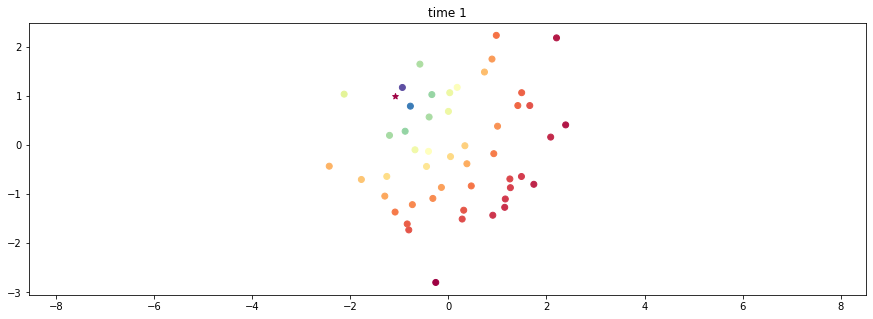

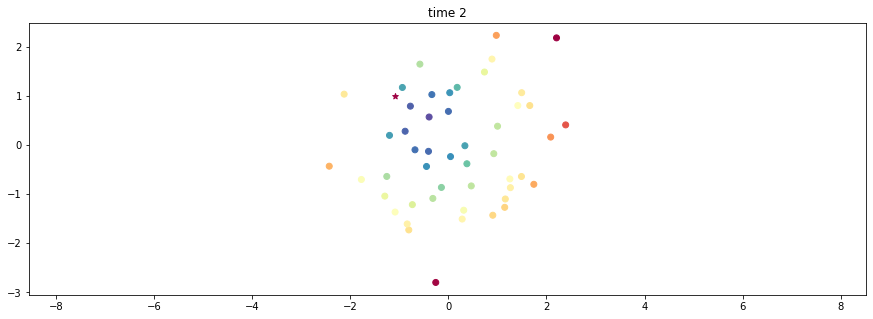

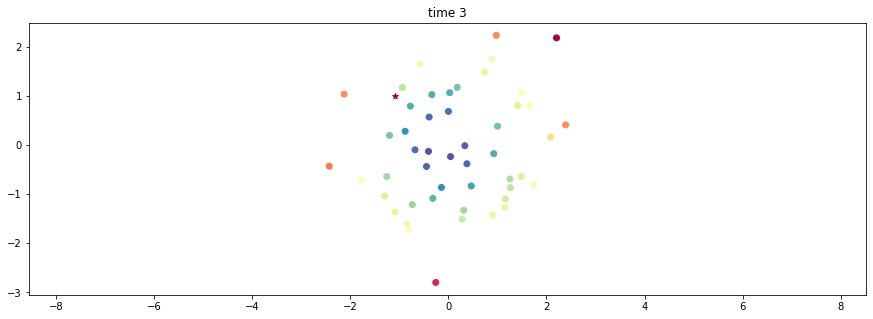

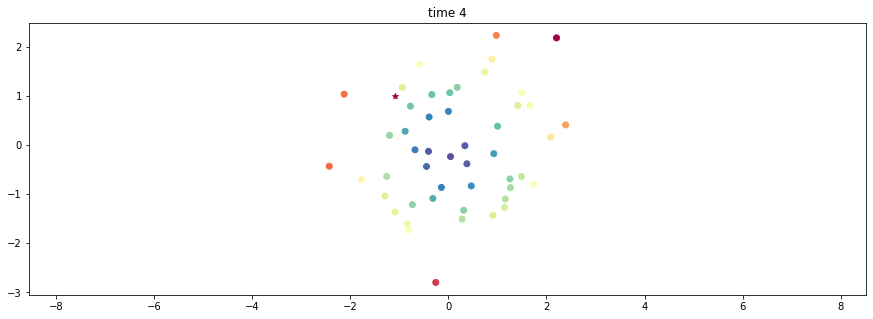

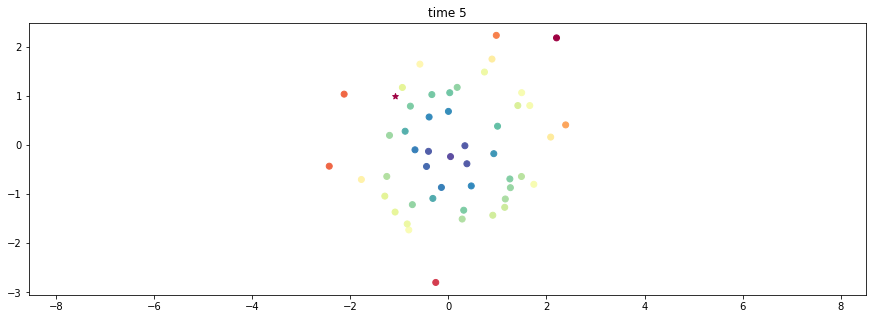

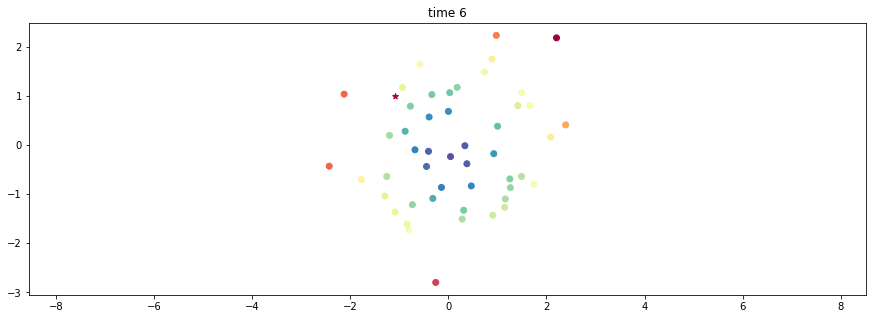

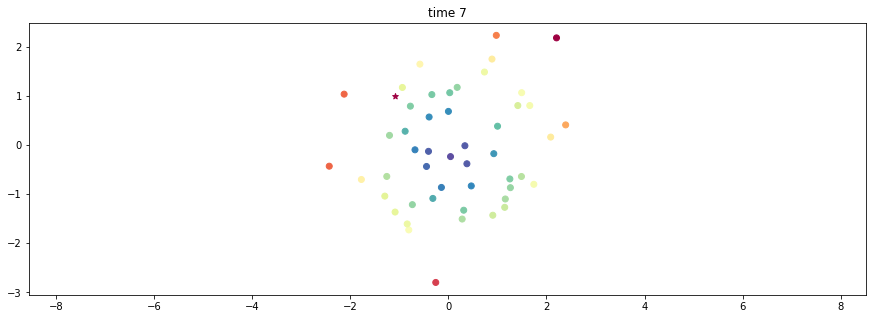

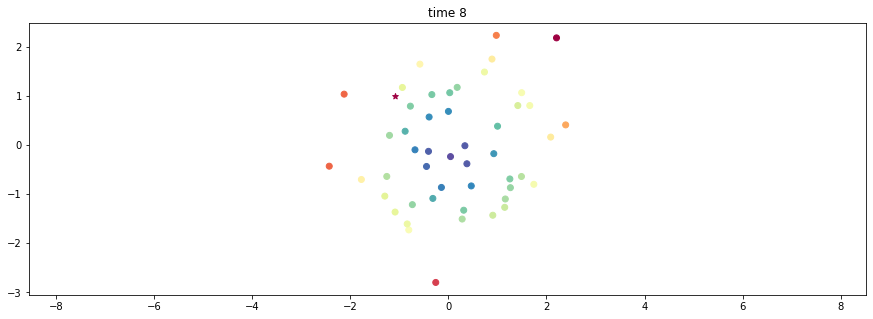

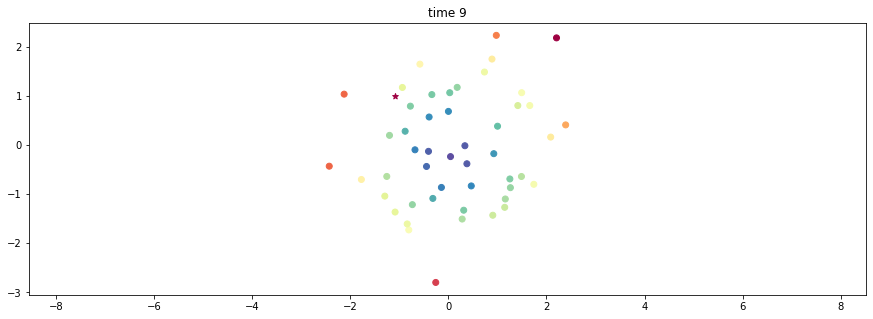

In [36]:
for t in range(1,10):
    Pt = evolution(P, t)
    plt.title(f'time {t}')
    plt.scatter(X[1:,0], X[1:,1], marker='o', c = Pt[1:,0], cmap=my_cmap)
    plt.scatter(X[0,0], X[0,1], marker='*', c = Pt[0,0], cmap=my_cmap)
    plt.axis('equal')
    plt.show()

## MC Distribution $\pi$

Let's analyze how evolves the graph and the stationary distribution $\pi$ with time. We are going to check how we tend to the stationary distribution, no matter how far we start from it.

<div class="tqst">

* Compute the stationary distribution $pi$.
    
* Check that $\pi_{t+1} = P \pi_{t} \to \pi$ (when $t\to\infty$), starting at an initial distribution far from the stationary one, for example $\pi_{0} = [1, 0, 0, ..., 0]$.
    
</div>

In [47]:
pi= np.sum(K, axis=1)/np.sum(K)
pi@P-pi

array([ 1.03172541e-03,  1.04556161e-04,  2.60816889e-03,  6.09814887e-03,
       -4.29399731e-04, -2.57605954e-03,  1.48800223e-04, -3.00674402e-03,
        7.73978217e-03, -1.50701516e-03,  1.21557179e-03,  1.15349581e-03,
        8.47285579e-05,  7.37288051e-04, -2.59145833e-03,  7.22749469e-03,
        2.81838873e-03, -2.23590036e-03, -2.41607543e-03, -1.58690225e-03,
        2.02515414e-03, -2.39307565e-03, -3.40696881e-03,  4.56047930e-03,
        5.15173277e-03,  1.04604036e-03,  1.85557712e-03, -1.16504881e-03,
        2.62832335e-03,  1.51940087e-03, -8.50106209e-04, -8.04000335e-04,
        5.09613802e-04, -3.64859459e-03, -2.47816781e-04, -2.45382719e-03,
       -6.35466288e-05,  6.09059097e-03, -3.26740814e-03,  1.45124117e-03,
       -8.46429856e-04,  1.46927294e-03, -1.69835693e-03, -4.76891486e-04,
        2.82957351e-03,  6.38466314e-04, -6.59161218e-04, -1.01342414e-03,
        1.21053402e-03, -3.36613041e-03])

In [51]:
pi= np.sum(K, axis=1)/np.sum(K)
print("Original Distribution: ", pi)

pi_t=np.zeros((N,1))
pi_t[0]=1
for t in range(100):
    pi_t = P.T@pi_t
    print("Step ", t, ": ", pi_t)

Original Distribution:  [0.01936937 0.02054184 0.01763492 0.01387081 0.02100595 0.02337396
 0.02033577 0.02386347 0.01147948 0.02199332 0.01885193 0.01922558
 0.02042148 0.01986002 0.0234225  0.01283145 0.01743604 0.0229117
 0.02308469 0.02226312 0.0183628  0.02310385 0.02424718 0.0152707
 0.01447406 0.01937558 0.01854111 0.0216663  0.01724341 0.01845227
 0.02141119 0.02150642 0.01960559 0.02455709 0.02080807 0.02326371
 0.02065433 0.01390211 0.02413789 0.01896537 0.02142825 0.01853744
 0.02243943 0.02105807 0.01719754 0.01993478 0.02107893 0.0215488
 0.0192115  0.02423883]
Step  0 :  [[0.05002639]
 [0.01132635]
 [0.03632712]
 [0.02624833]
 [0.01028872]
 [0.02314895]
 [0.01035598]
 [0.01853093]
 [0.01466911]
 [0.01483358]
 [0.01999206]
 [0.04485769]
 [0.02085911]
 [0.01015305]
 [0.01458033]
 [0.0108215 ]
 [0.0222516 ]
 [0.01319912]
 [0.02383879]
 [0.03002027]
 [0.01341297]
 [0.02792203]
 [0.01669624]
 [0.01088003]
 [0.02007756]
 [0.01797248]
 [0.00978443]
 [0.02557637]
 [0.01950244]
 [

# Spectral Theory

<div class="tqst">

* Compute the eigendecomposition of $P$.

* Plot the eigenvalues to check how fast they tend to $0$.
    
* Compute the diffusion coordinates for `t=1`.
   
    **Remark**: Now the most important eigenvalues are the biggest ones.
</div>